In [1]:
import sys
sys.path.append("..")
from mock_backends.ibm import *

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject


In [3]:
from qiskit.transpiler.coupling import CouplingMap
def pretty_print(pb):
    #for printing remove bidirectional edges
    temp = list(pb.coupling_map.get_edges())
    temp2 = []
    for (i,j) in temp:
        if not (j,i) in temp2:
            temp2.append((i,j))
    x = CouplingMap(temp2)

    #black magic errors when I modify the draw function directly in the CouplingMap file so Im just copying the code here to make it work
    import pydot
    from PIL import Image
    import io
    formatter2 = lambda _: dict(dir="none")
    dot_str = x.graph.to_dot(edge_attr=formatter2, graph_attr={"size":"0"})
    dot = pydot.graph_from_dot_data(dot_str)[0]
    png = dot.create_png(prog="sfdp")
    pdf = dot.create_pdf(prog="sfdp")
    #png = dot.create_png(prog="neato")
    return Image.open(io.BytesIO(png))

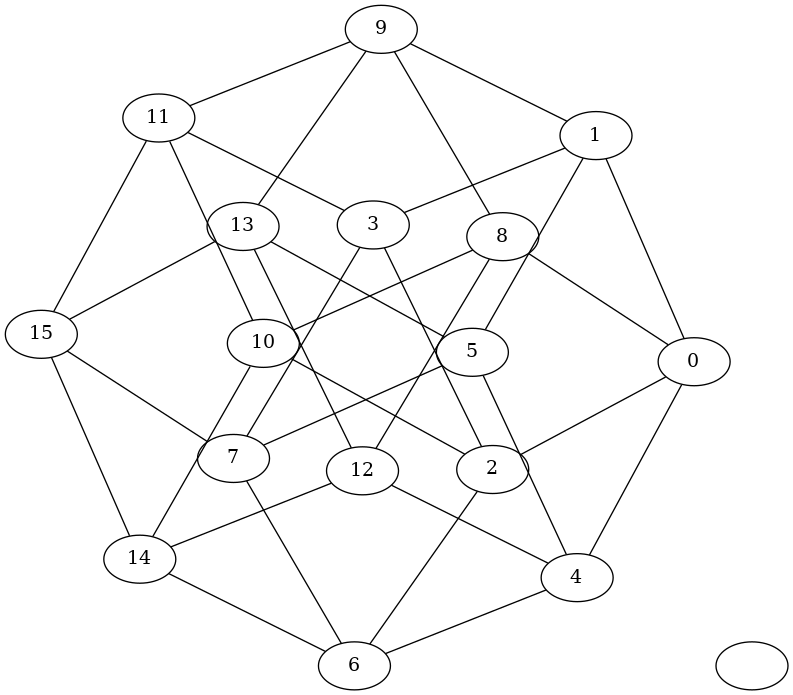

In [4]:
from backend_utils.mock_backends import FakeHyperCubeV2, FakeHyperCubeSnail
backend_list = [FakeHyperCubeV2(n_dimension=4), FakeHyperCubeSnail(corral_skip_pattern=(0,0)), FakeHyperCubeSnail(corral_skip_pattern=(0,1))]
pb = backend_list[0]
pretty_print(pb)

In [ ]:
from mock_backends.fake_heavyhex import FakeHeavyHex
pb = FakeHeavyHex()
pretty_print(pb)

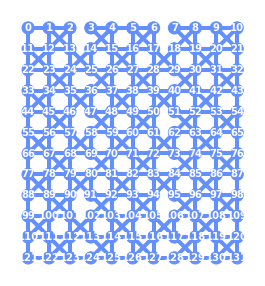

In [ ]:
pb = PenguinV1()
from utils.qiskit_patch.gate_map import plot_gate_map
plot_gate_map(pb, qubit_coordinates=pb.qubit_coordinates)

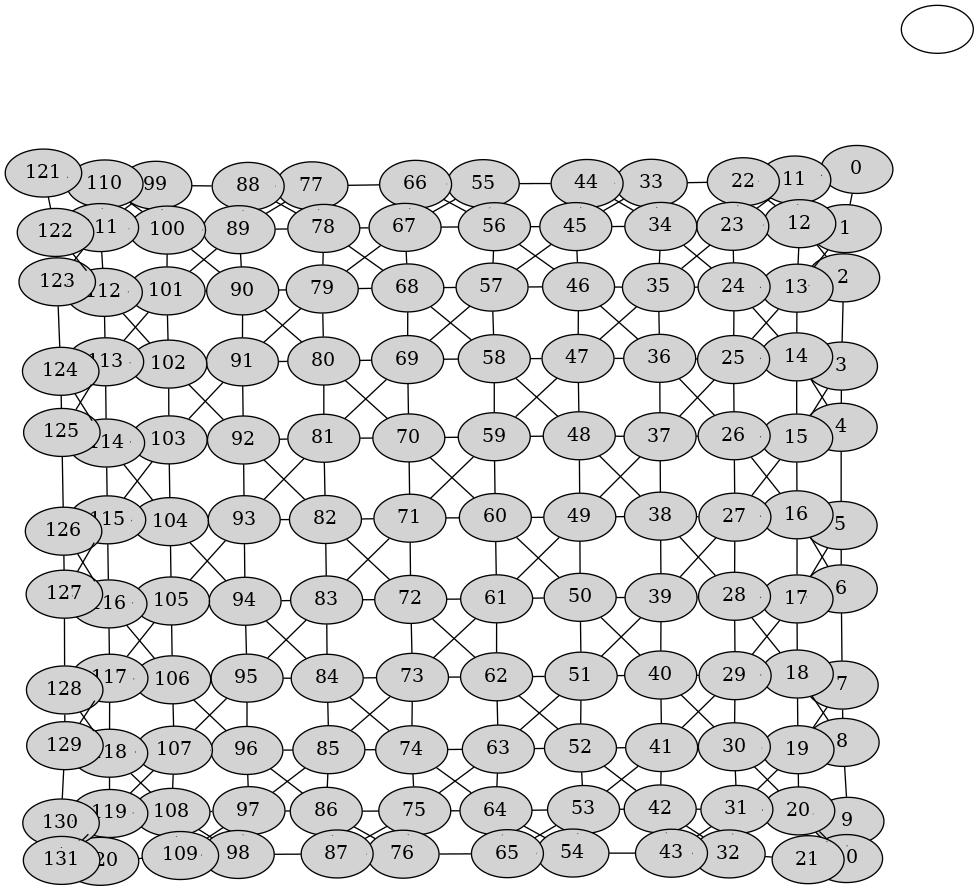

In [ ]:
pb = PenguinVIdeal(twoqubitgate="cx")
plot_gate_map(pb, qubit_coordinates=pb.qubit_coordinates)
pretty_print(pb)

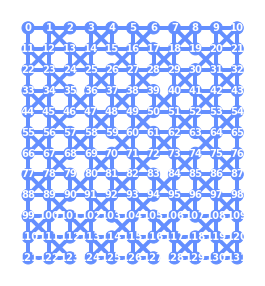

In [ ]:
pb = PenguinV2()
plot_gate_map(pb, qubit_coordinates=pb.qubit_coordinates)

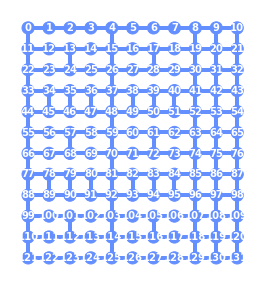

In [ ]:
pb = PenguinV3()
plot_gate_map(pb, qubit_coordinates=pb.qubit_coordinates)

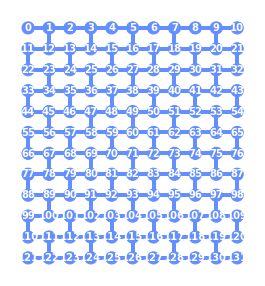

In [ ]:
pb = PenguinV4()
plot_gate_map(pb, qubit_coordinates=pb.qubit_coordinates)

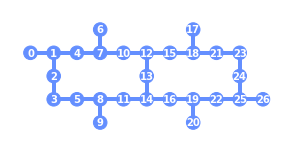

In [ ]:
pb = FalconR4()
plot_gate_map(pb)#, qubit_coordinates=pb.qubit_coordinates)

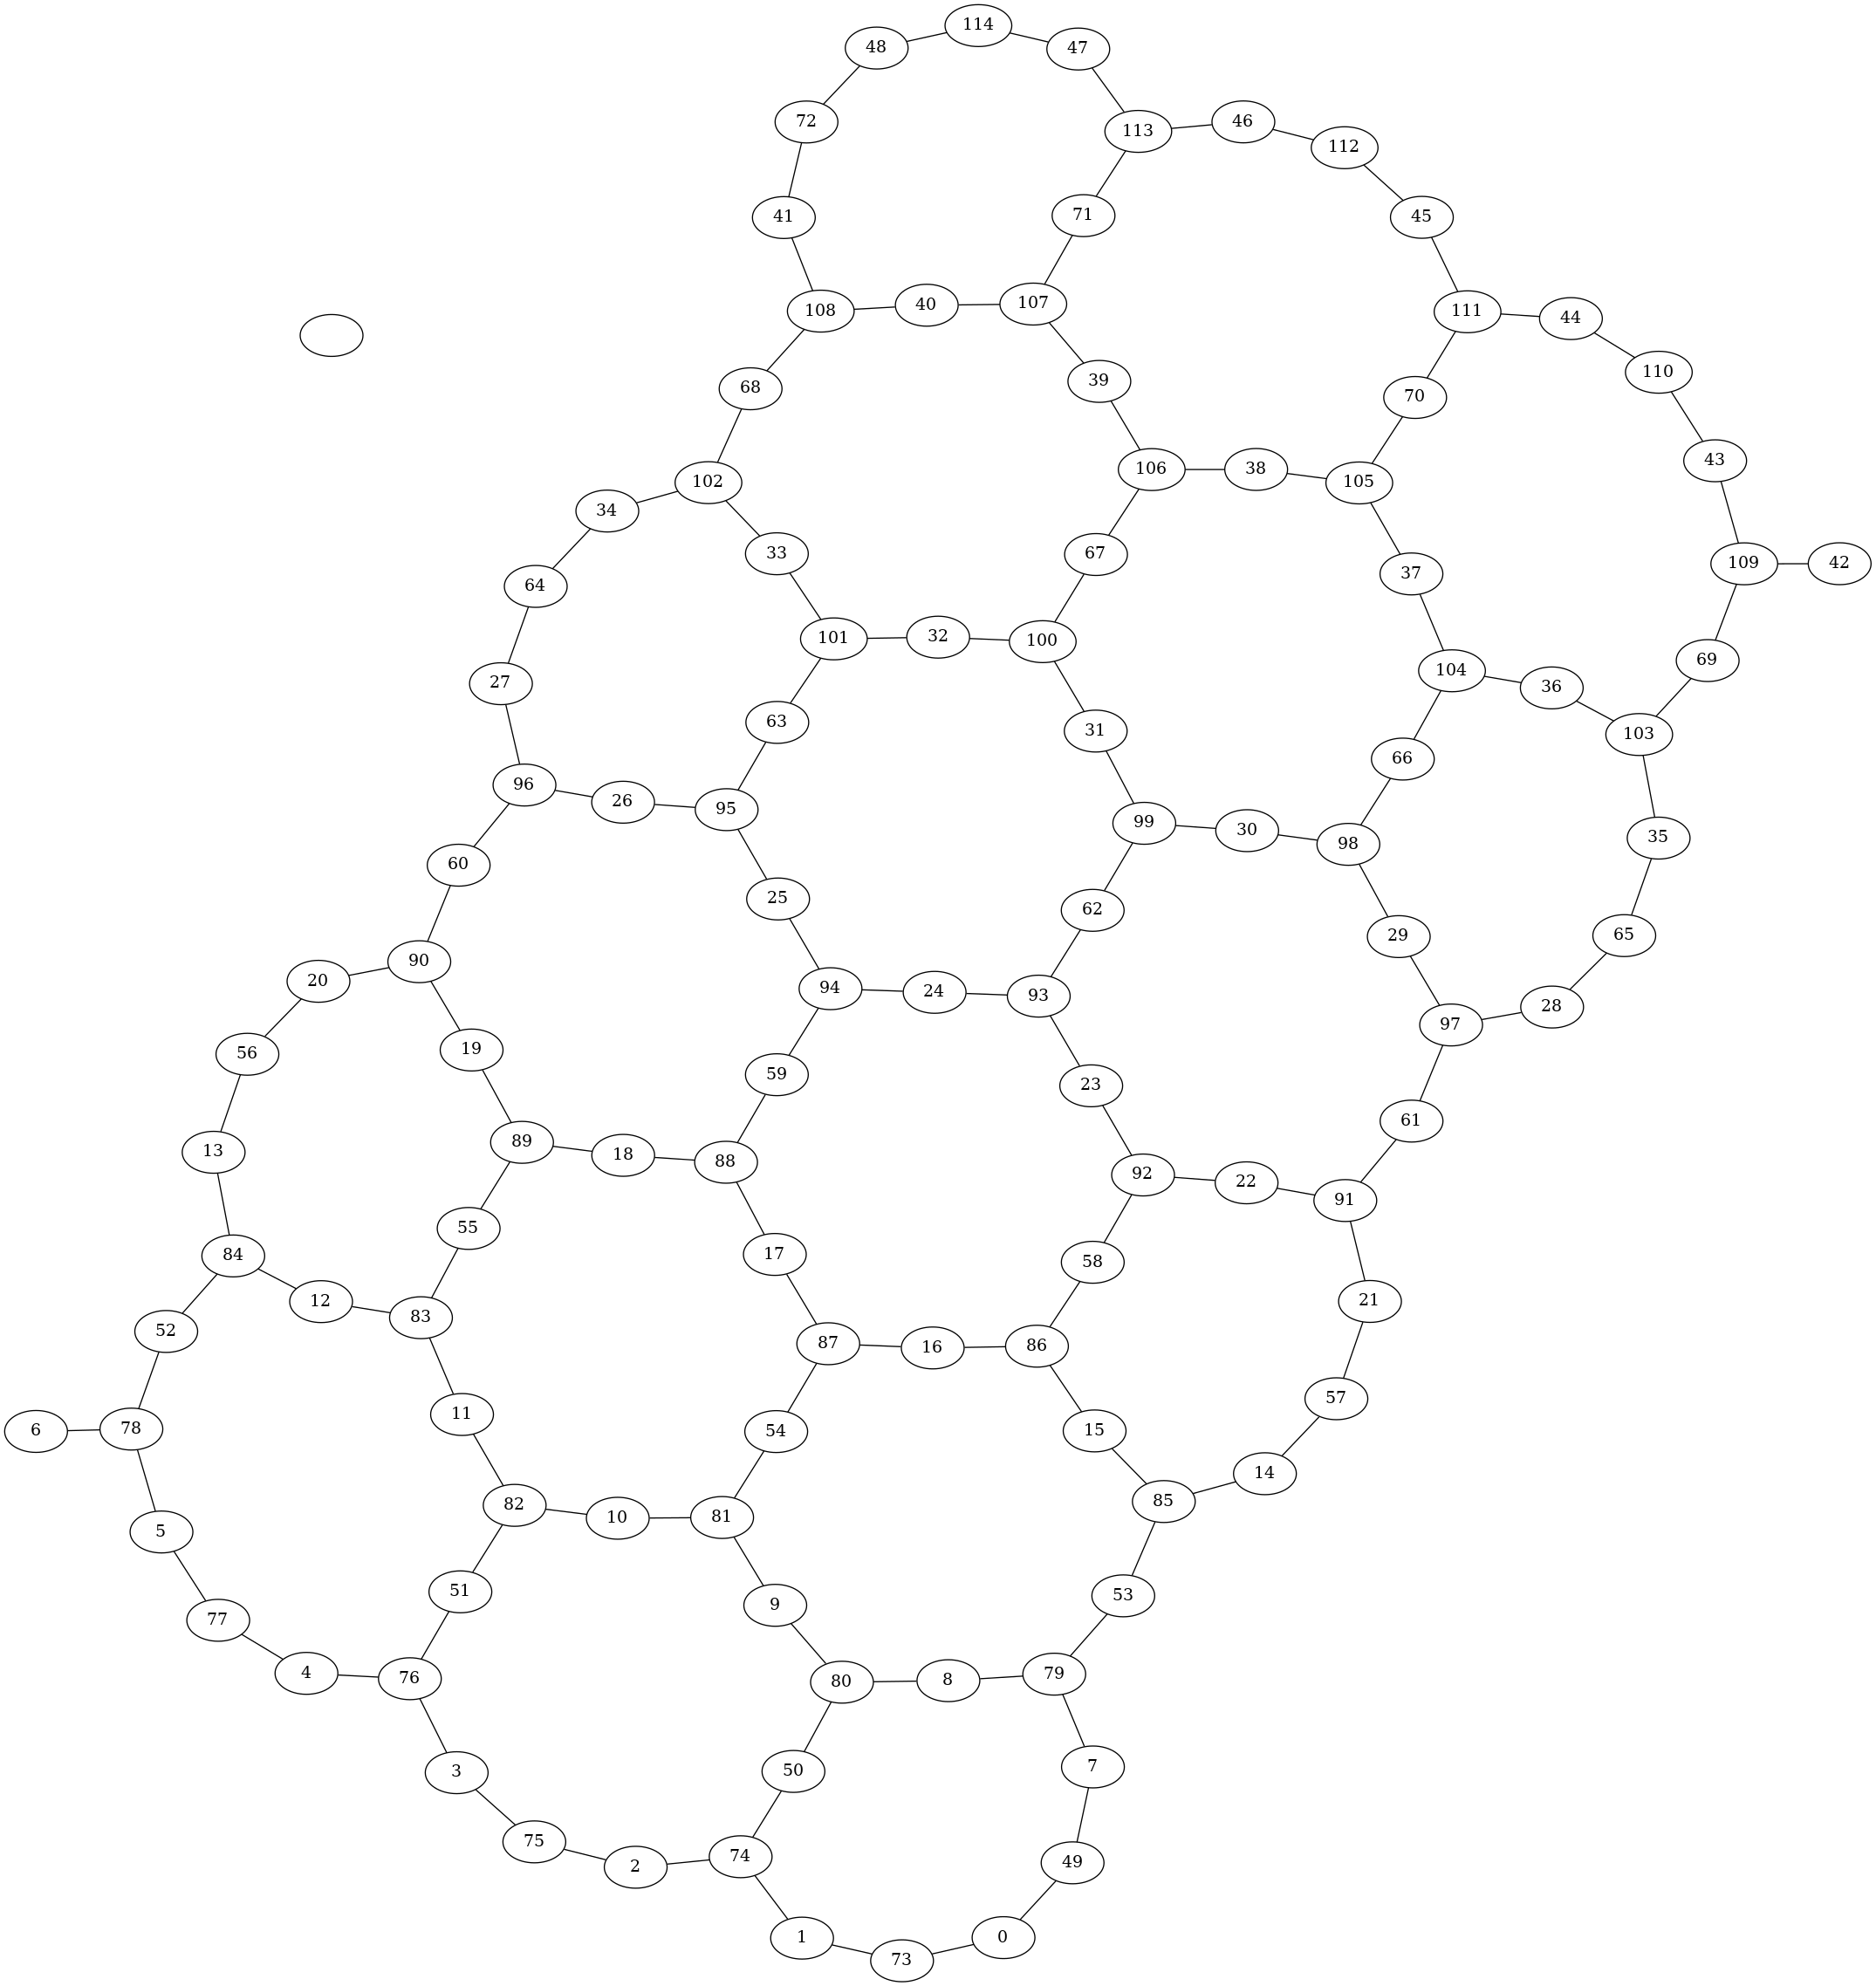

In [ ]:
from mock_backends.fake_heavyhex import FakeHeavyHex
pb = FakeHeavyHex()
# from qiskit.transpiler.coupling import CouplingMap
# CouplingMap(pb.coupling_map.get_edges()).draw()
pretty_print(pb)

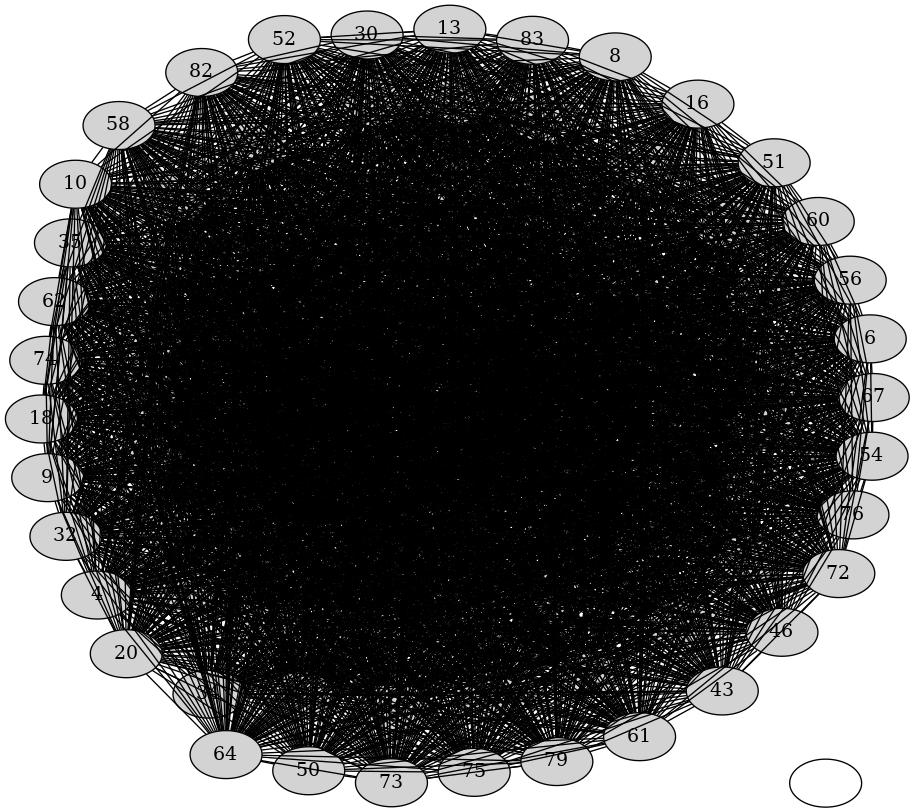

In [ ]:
from mock_backends.fake_allToAll import FakeAllToAll
pb = FakeAllToAll()
# from qiskit.transpiler.coupling import CouplingMap
# CouplingMap(pb.coupling_map.get_edges()).draw()
pretty_print(pb)

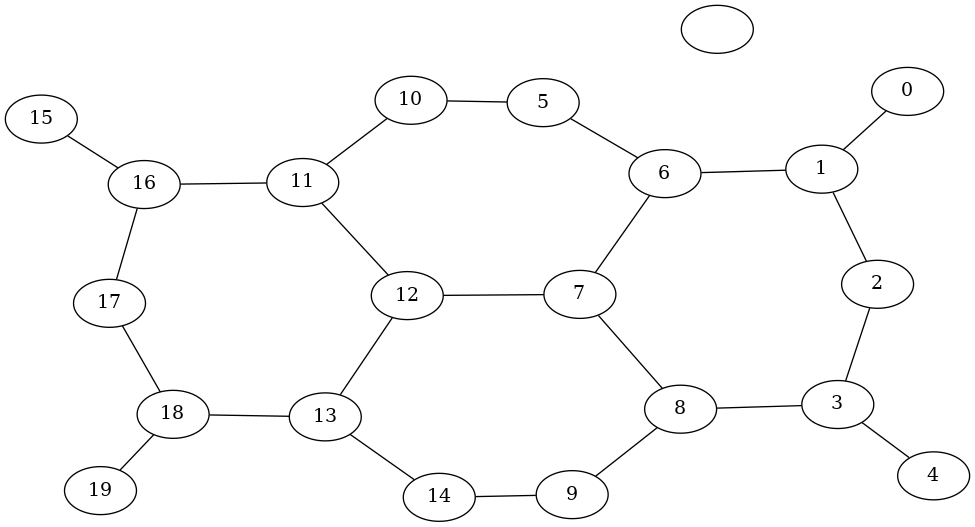

In [ ]:
from mock_backends import PenguinV4
pb = PenguinV4()
from qiskit.transpiler.coupling import CouplingMap
# CouplingMap(pb.coupling_map.get_edges()).draw()
pretty_print(pb)

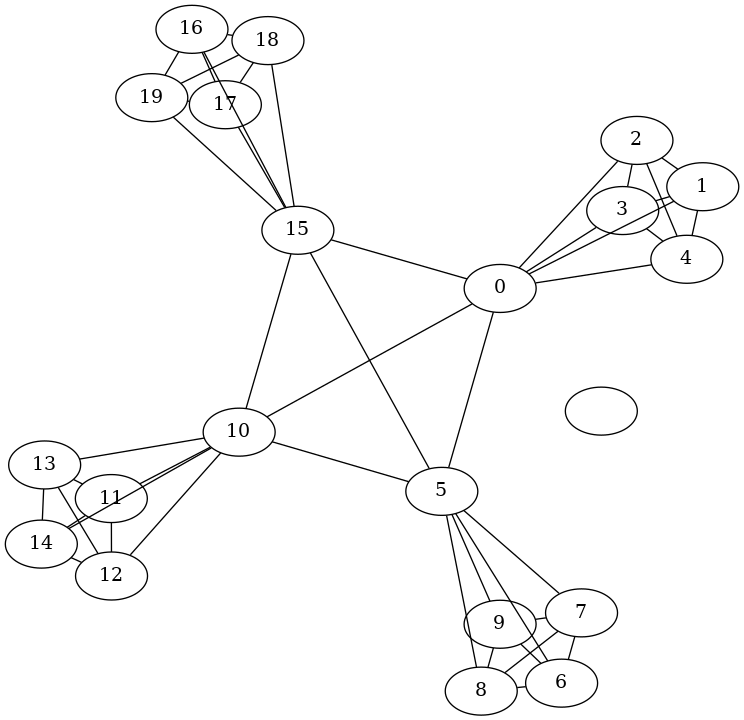

In [ ]:
from mock_backends.fake_hatlab import FakeHatlab
pb = FakeHatlab(num_qubits=20, router_as_qubits=True, round_robin=0)
from qiskit.transpiler.coupling import CouplingMap
# CouplingMap(pb.coupling_map.get_edges()).draw()
pretty_print(pb)

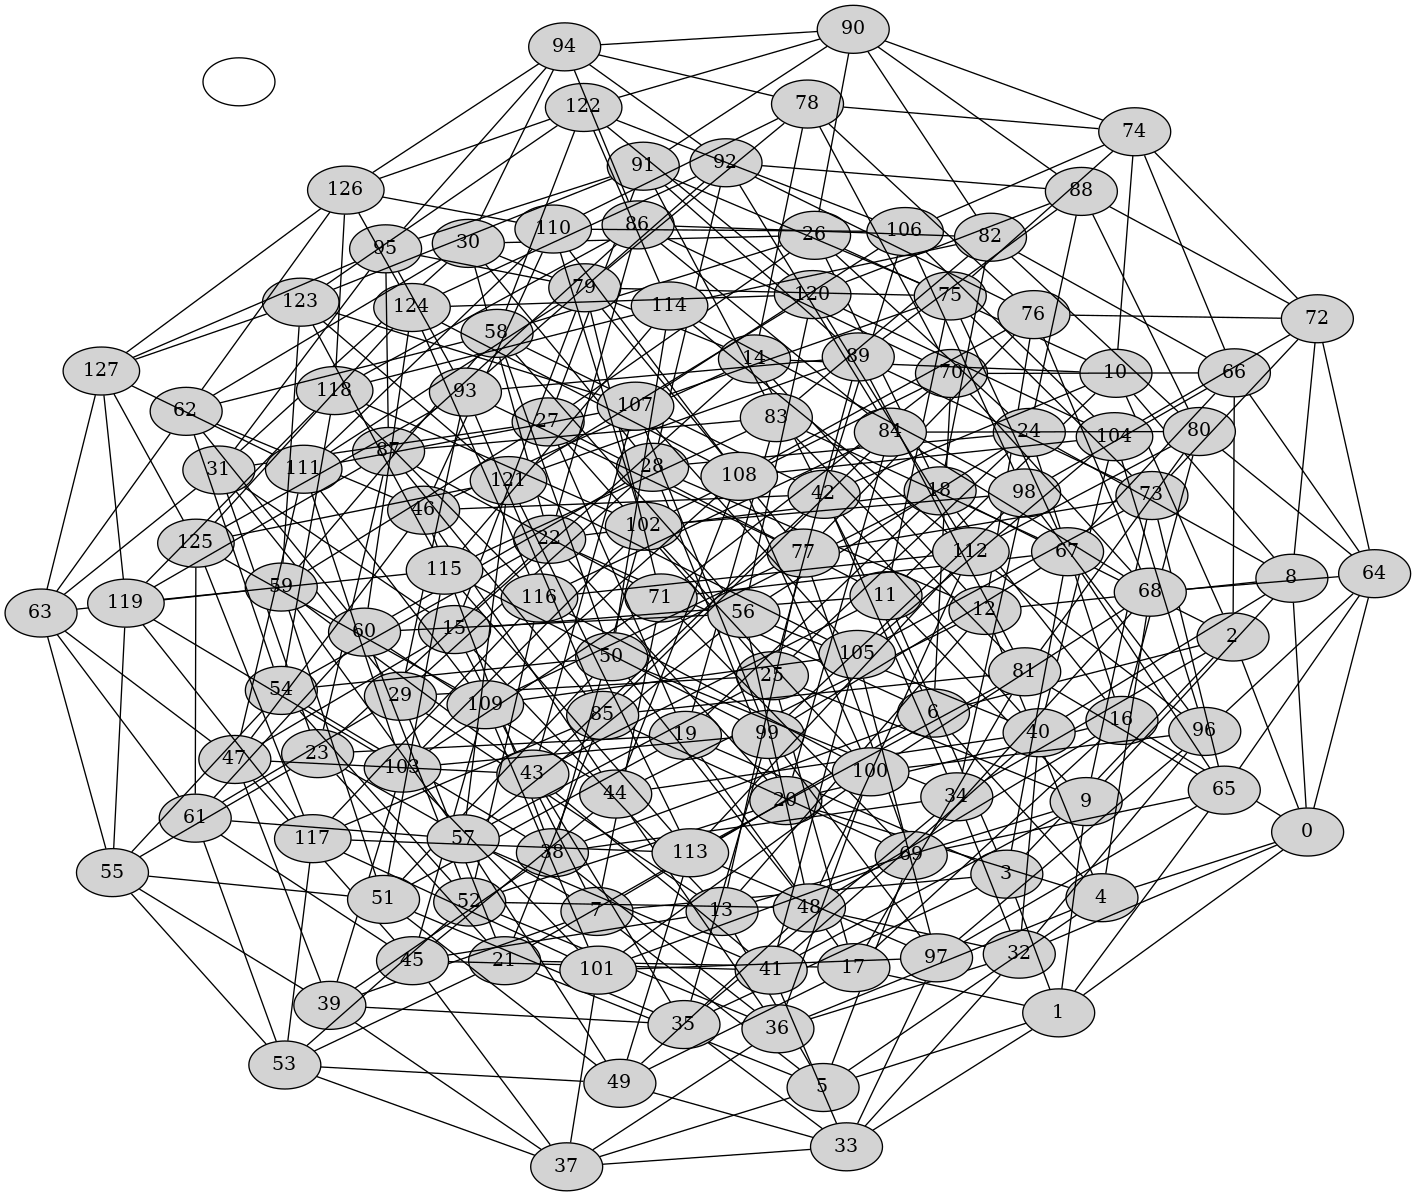

In [66]:
from mock_backends.fake_hypercube import FakeHyperCubeV2
pb = FakeHyperCubeV2(n_dimension=4)
# from qiskit.transpiler.coupling import CouplingMap
# CouplingMap(pb.coupling_map.get_edges()).draw()
pretty_print(pb)

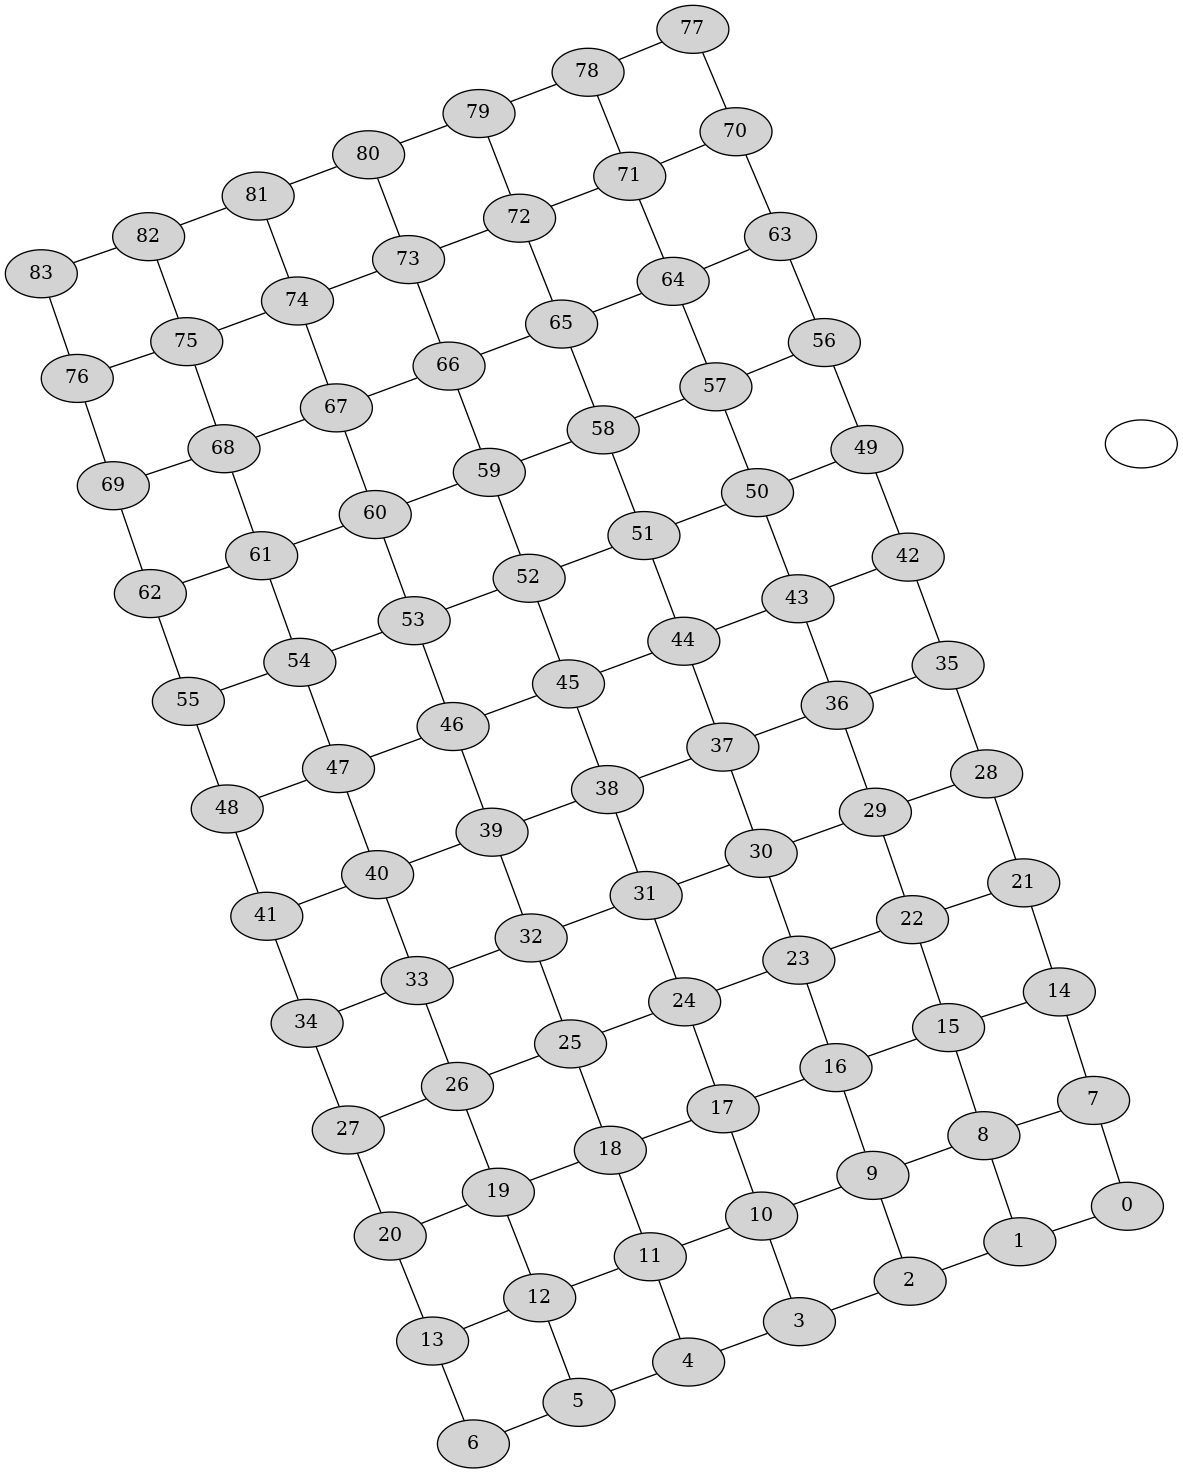

In [12]:
from mock_backends.fake_surfaceCode import FakeSurfaceCode
pb = FakeSurfaceCode(qubit_size=84, row_length=7)
from qiskit.transpiler.coupling import CouplingMap
pretty_print(pb)

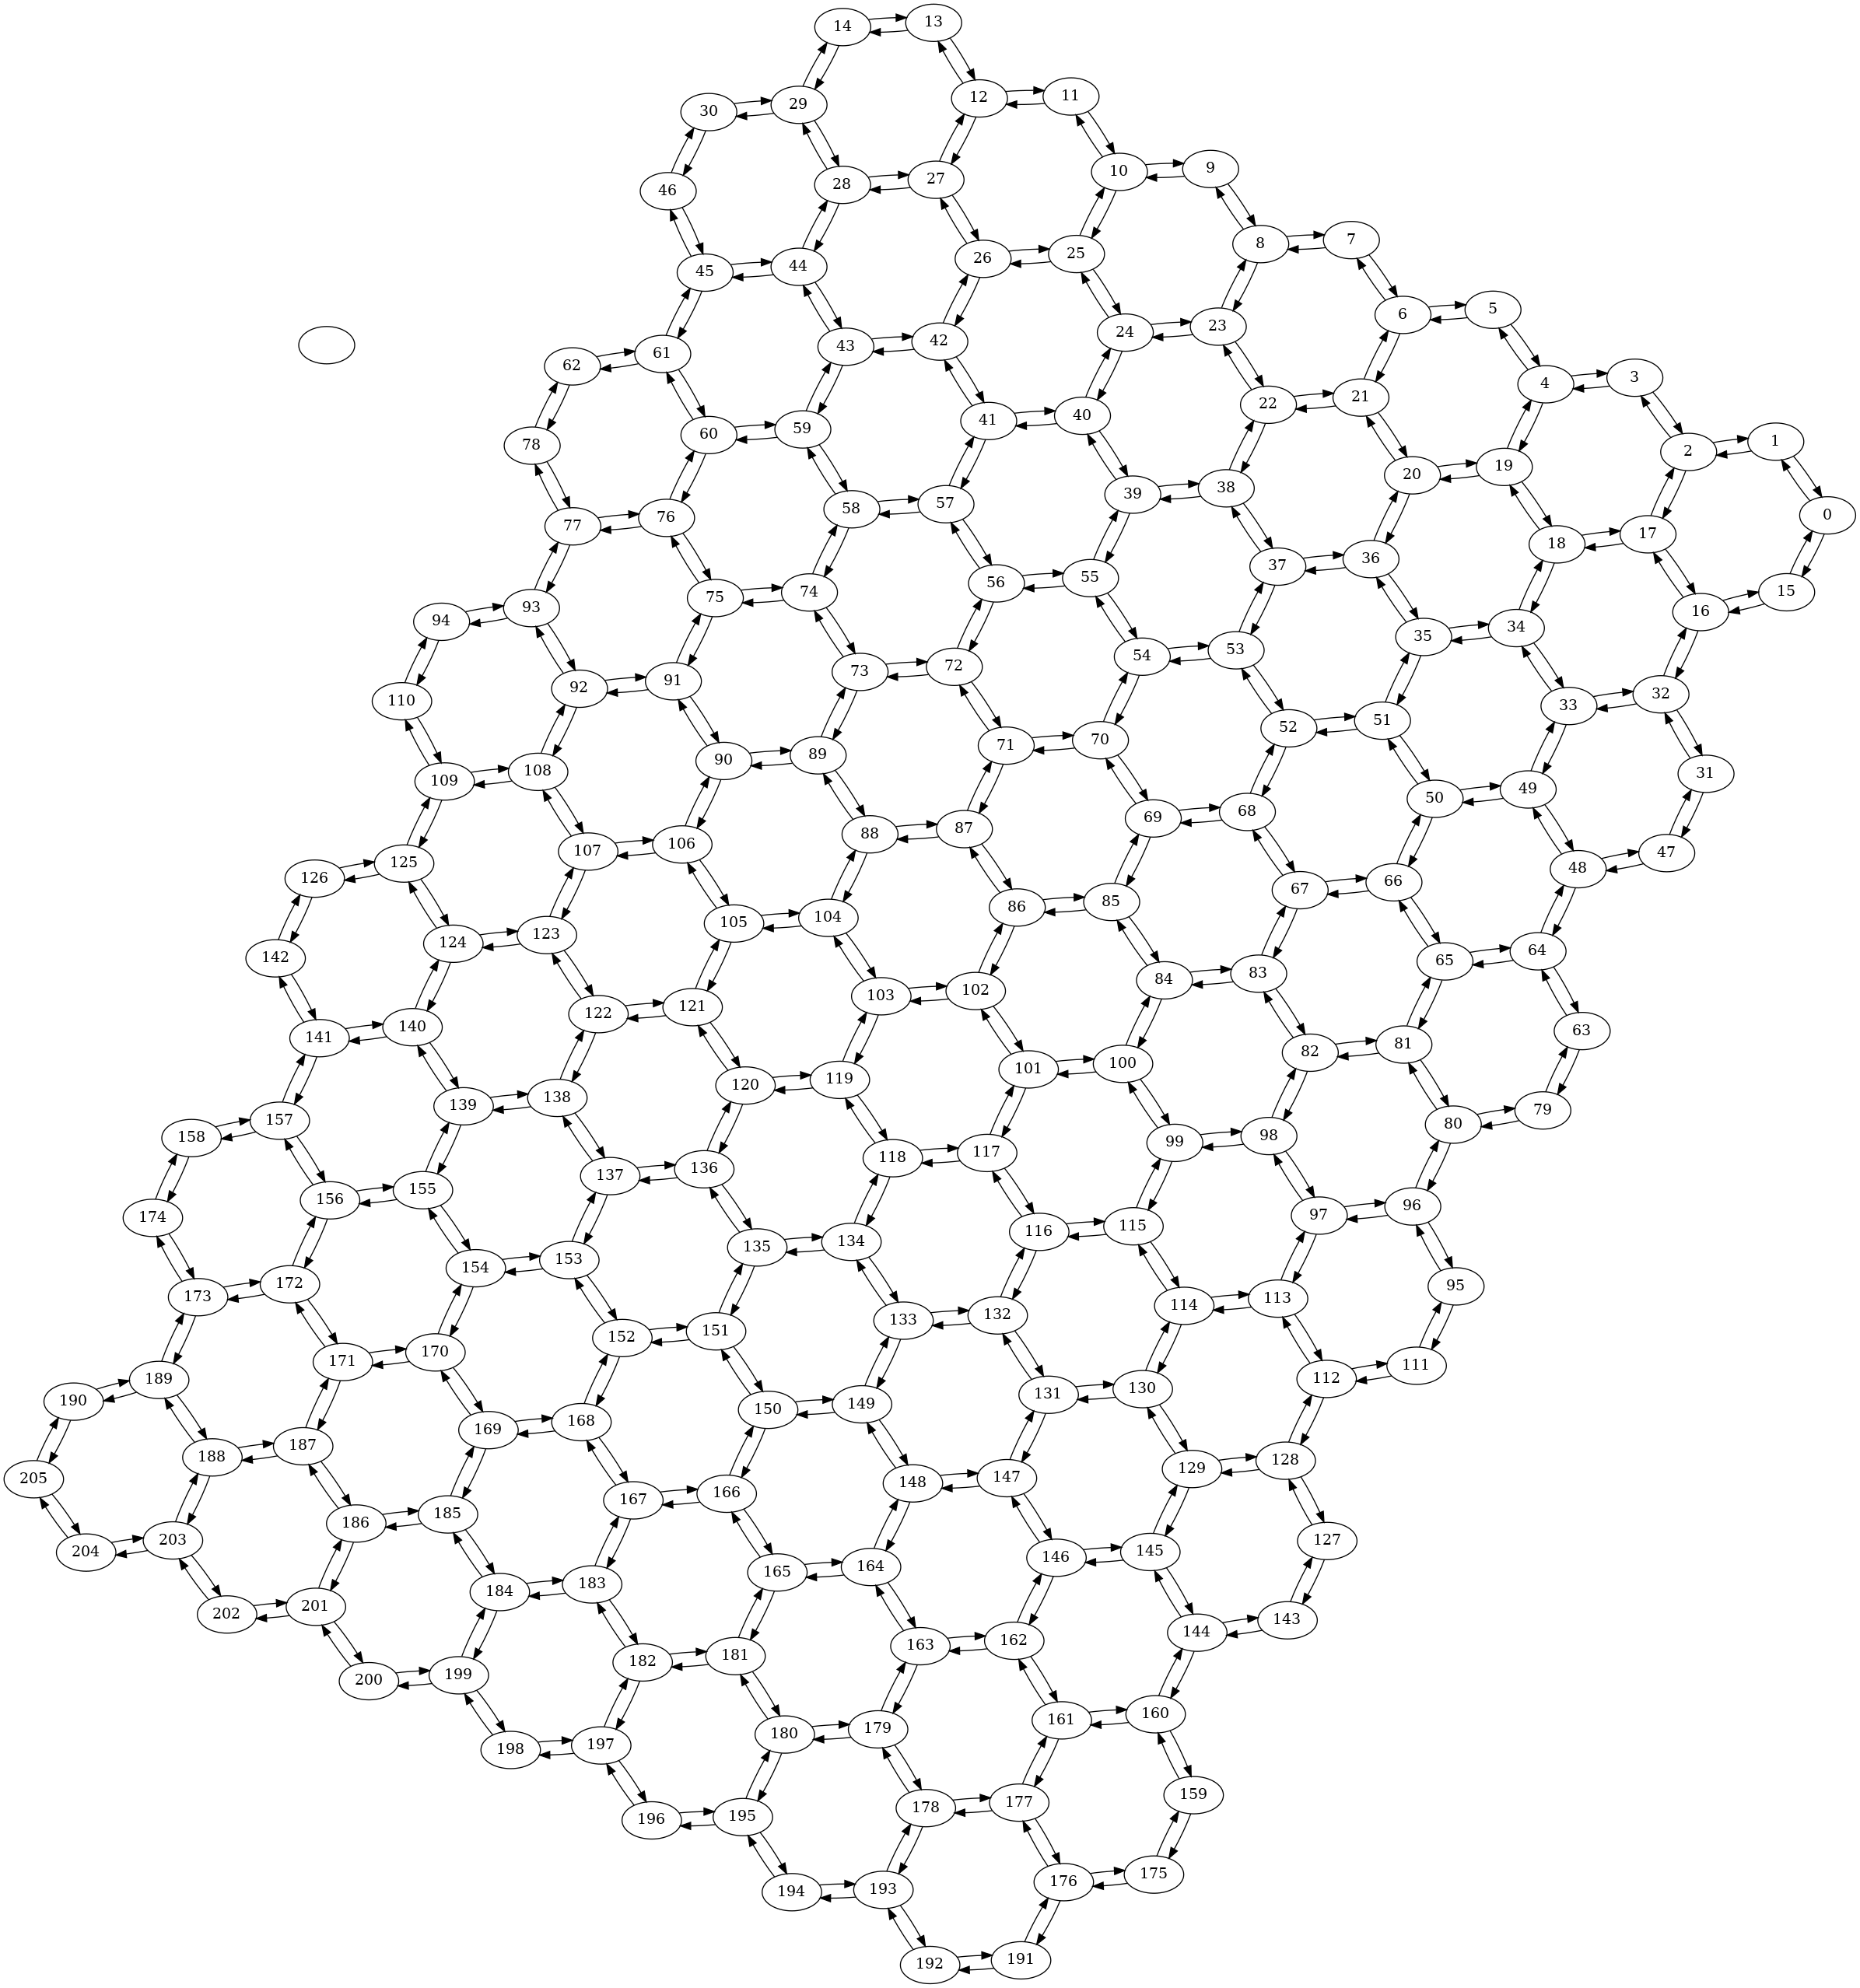

In [24]:
from mock_backends.fake_hexLattice import FakeHexLattice
pb = FakeHexLattice()
from qiskit.transpiler.coupling import CouplingMap
CouplingMap(pb.coupling_map.get_edges()).draw()

In [47]:
# import itertools
# from qiskit.test.mock.utils.configurable_backend import ConfigurableFakeBackend
# from qiskit.providers.models import BackendProperties
# from qiskit.providers.models.backendproperties import Nduv, Gate
# from qiskit.exceptions import QiskitError
# from qiskit.circuit.library.standard_gates import (
#     IGate,
#     RXGate,
#     RYGate,
#     CZGate,
#     SwapGate,
#     U3Gate
# )


# class FakeExampleV2(ConfigurableFakeBackendV2):
#     """A mock backendv2"""

#     def __init__(self):
#         qubits = list(range(4))
#         coupling_map = [[0, 1], [0, 2], [0, 3], [1, 2]]
#         qubit_coordinates = [[0, 1], [1, 0], [1, 1], [1, 2]]

#         gate_configuration = {}
#         gate_configuration[IGate] = [(i,) for i in qubits]

#         # only can do RXGates on qubits 0 and 4
#         gate_configuration[U3Gate] = [
#             (i,) for i in list(set(qubits).difference([1, 2]))
#         ]
#         # can do RY on all qubits
#         gate_configuration[RYGate] = [(i,) for i in qubits]

#         # can do CZ on all pairs in coupling map
#         gate_configuration[CZGate] = [(i, j) for i, j in coupling_map]

#         # can only measure qubits 2,3
#         measurable_qubits = [2, 3]

#         super().__init__(
#             name="mock_example",
#             description="a mock backend",
#             n_qubits=len(qubits),
#             gate_configuration=gate_configuration,
#             parameterized_gates={U3Gate: ["theta", "phi", "lam"], RYGate: ["theta"]},
#             measurable_qubits=measurable_qubits,
#             qubit_coordinates=qubit_coordinates,
#         )


NameError: name 'ConfigurableFakeBackendV2' is not defined